**ANALYSIS OF HONEY PRODUCTION FROM 1998-2012**

In [ ]:
#starting with importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Readiing the dataset
honeyprod = pd.read_csv("/content/honeyproduction.csv")

In [ ]:
#Viewing the first few rows of the dataset
honeyprod.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.


**A) EXPLORING QUANTITATIVE VARIABLES**

In [ ]:
#Checking the shape of the dataset
honeyprod.shape

(626, 8)

Observations: We have 626 observations and 8 columns

In [ ]:
#Checking the datatype of the variables to make sure that the data is read in properly
honeyprod.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

Observations:
1.state is object data type
2.year is integer type currently. Since year is a categorical variable here, let us convert it to category data data type in Python.
3.All the other variables are numerical and there for their python data types (float64 and int64) are ok.


In [ ]:
# To convert year into categories
honeyprod.year = honeyprod.year.astype('category')

B) EXPLORING QUALITATIVE VARIABLES

In [ ]:
honeyprod.describe()


,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


Observations:
1.Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
2.The mean numcol is close to the 50% percentile of the data, indicating a right skew.
3.As expected, standard deviation of numcol is very high
4.yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
5.Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.


**c) LOOKING AT THE RELATIONSHIP BETWEEN NUMERICAL VARIABLES USING PAIR PLOT AND CORRELATION PLOTS.**


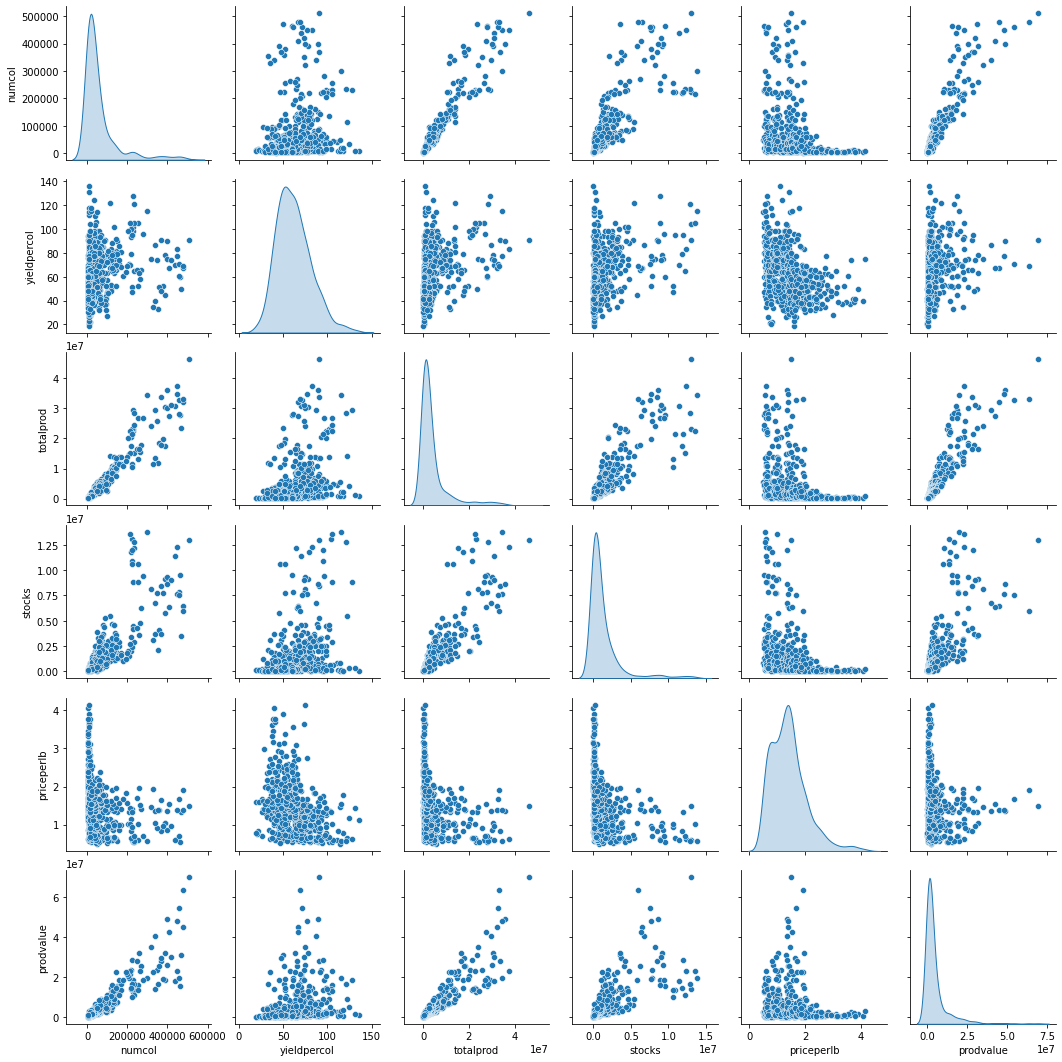

In [ ]:
#The pairplot
sns.pairplot(honeyprod, diag_kind="kde")


In [ ]:
#The 2D correlation plot
correlation = honeyprod.corr() 
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


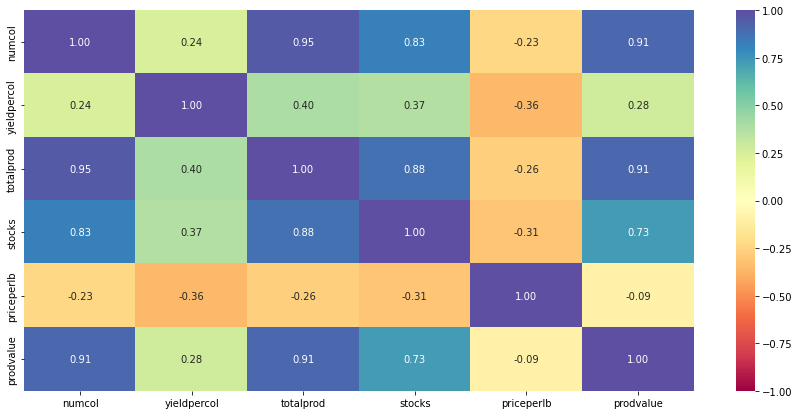

In [ ]:
# Uncomment the following code for information of the arguments
# help(sns.heatmap)
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.
Yield per colony does not have a high correlation with any of the features that we have in our dataset.
Same is the case with priceperlb.
Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.


In [ ]:
#the categorical features - state and year
print(honeyprod.state.nunique())
print(honeyprod.year.nunique())


44
15


We have honey production data for 44 US states over a span of 15 years, from 1998 to 2012.

**D)LOOKING AT THE OVERALL TREND OF HONEY PRODUCTION IN THE US OVER YEARS**

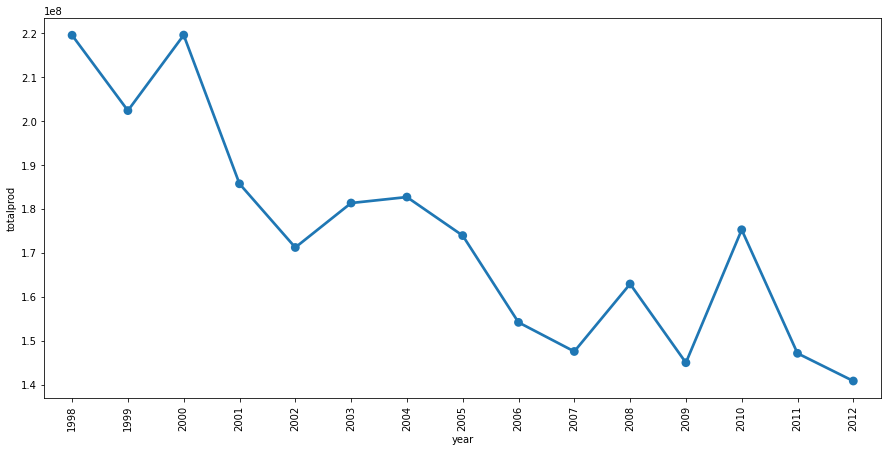

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

# Uncomment the following code to check the actual values
# honeyprod.groupby(['year'])['totalprod'].sum().reset_index()


Observations:
1.The overall honey production in the US has been decresing over the years.
2.Total honey production = number of colonies * average yield per colony. Let us check if the honey production is decreasing due to one of these factors or both.

E) VARIATION IN THE NUMBER OF COLONIES OVER THE YEARS

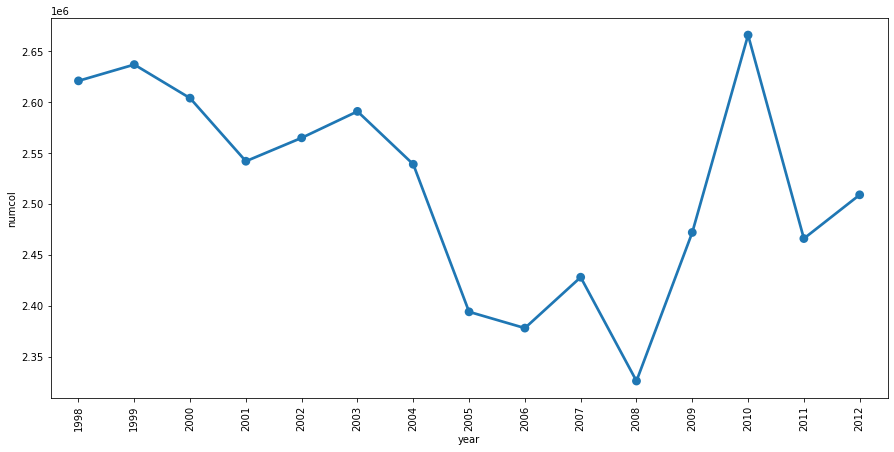

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()


Observations:
1.The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.
2.It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

F) ANALYSING THE VARIATION OF YIELD PER COLONY OVER THE YEARS AND PRODUCTION TREND AT STATE LEVEL

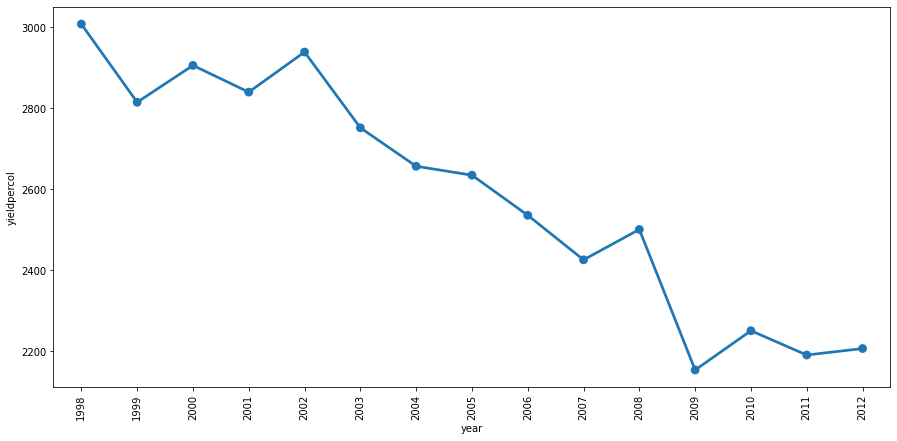

In [ ]:
#The yield 
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observation:
1.In contrast to number of colonies, the yield per colony has been decreasing since 1998.
T2.his indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.


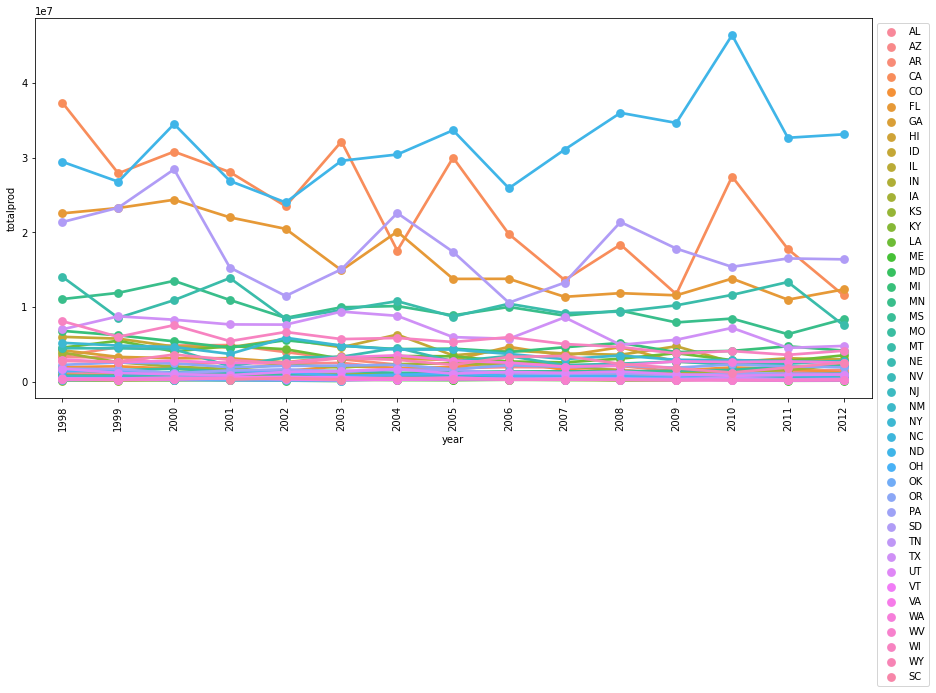

In [ ]:
#The Production Trend
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations: There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding.

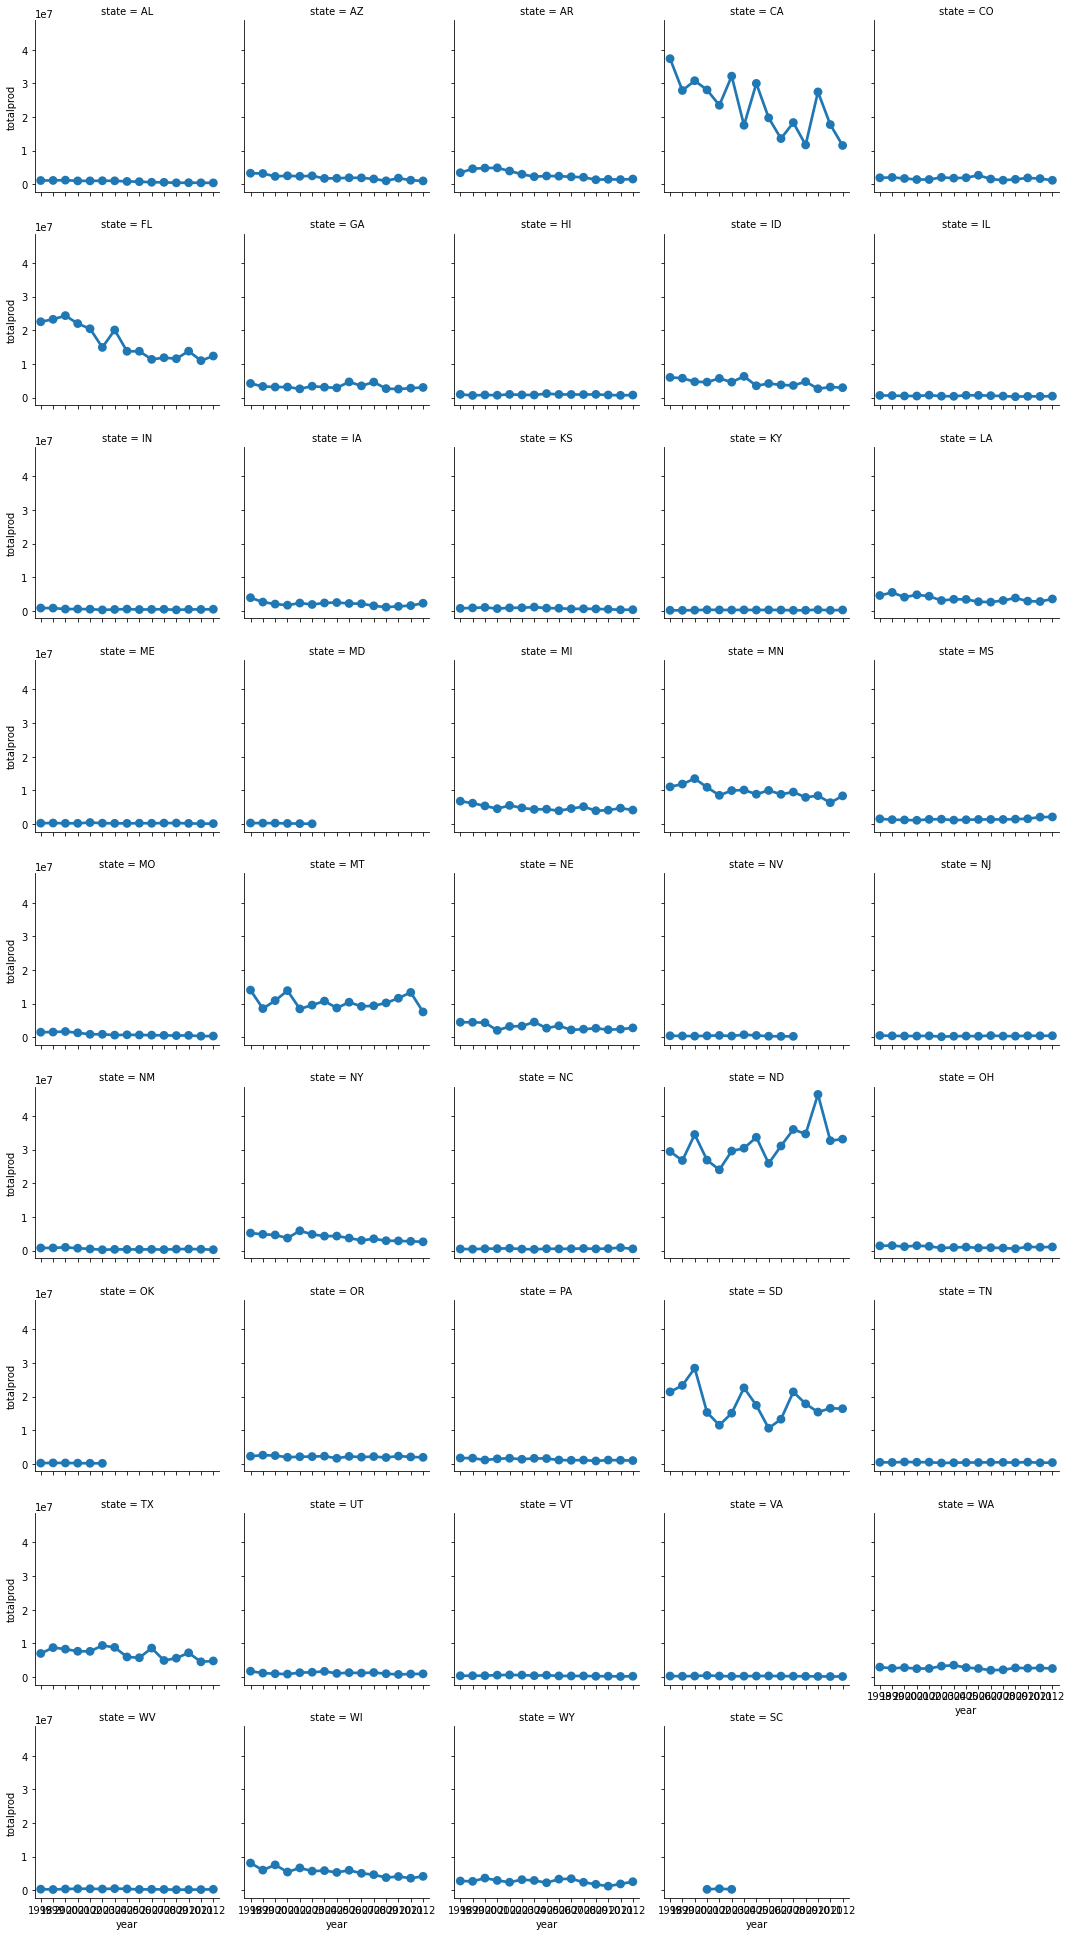

In [ ]:
#The Catplot
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
plt.show()


Observations:
1.The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
2.Unfortunately, the honey production in California has seen a steep decline over the years.
3.Florida's total production also has been on a decline.
4.South Dakota has more of less maintained its levels of production.
5.North Dakota has actually seen an impressive increase in the honey production.

**G) ANALYSING WHAT EFFECT THE DECLINING PRODUCTION TREND HAS HAD ON THE VALUE OF PRODUCTION**

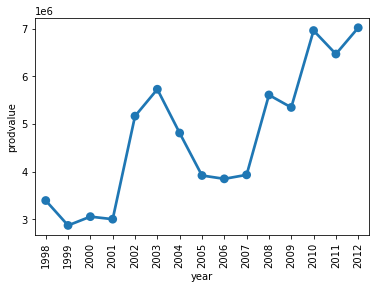

In [ ]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()


Observations:
1.This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.
2.As the supply declined, the demand has added to the value of honey.

H) PATTERNS OBSERVED BETWEEN TOTAL HONEY PRODUCTION AND VALUE OF PRODUCTION EVERY YEAR. HOW HS THE VALUE OF PRODUCTION ,WHICH IN SOME SENSE COULD BE TIED TO DEMAND, CHANGED EVERY YEAR?

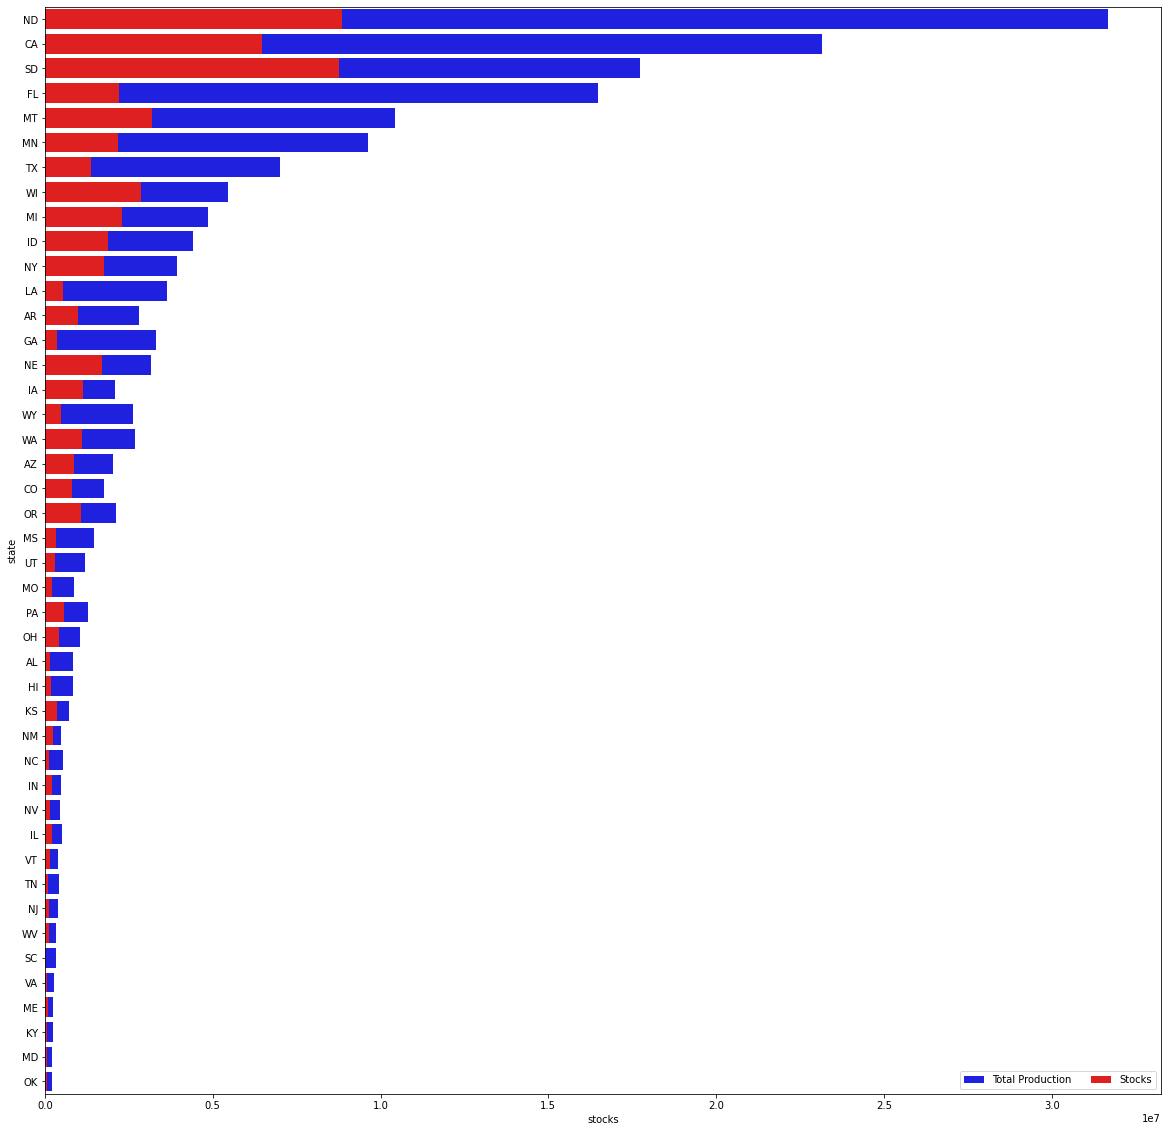

In [ ]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend  
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()


Observations:
1.North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.
2.Florida has the highest efficiency among the major honey producing states
3.Michigan is more efficient than Wisconsin in selling honey.


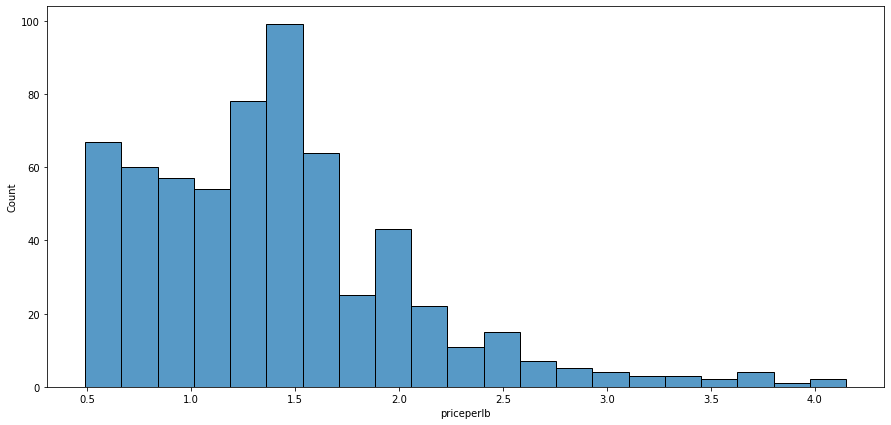

In [ ]:
#The spread of average price of a pound of honey
plt.figure(figsize=(15, 7))
sns.histplot(honeyprod.priceperlb)
plt.show()


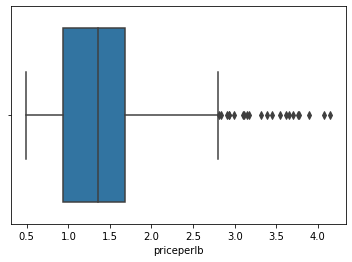

In [ ]:
#The Box Plot
sns.boxplot(data = honeyprod, x = 'priceperlb')
plt.show()


Observations:
1.Price per pound of honey has a right skewed distribution with a lot of outliers towards the higher end.
2.The median price per pound of honey is 1.35

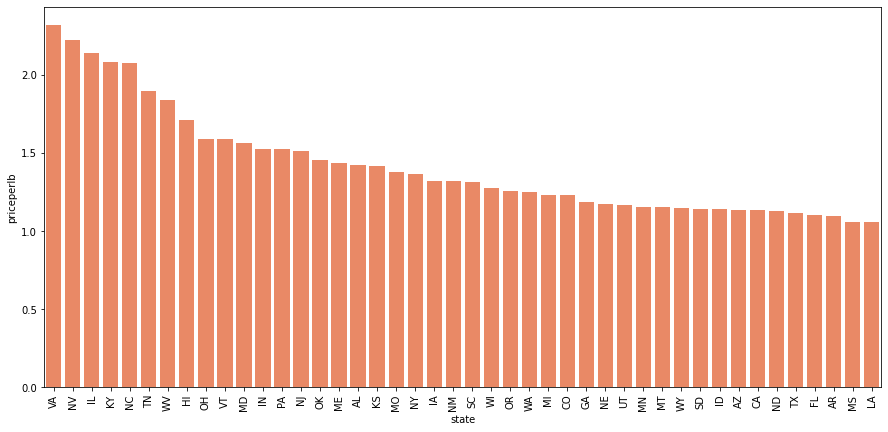

In [ ]:
#The average price per pound of honey across states
plt.figure(figsize=(15, 7)) # To resize the plot
sns.barplot(data = honeyprod, x = "state", y = "priceperlb", ci=None, color = "coral",
            order=honeyprod.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

Observations:
1.Virginia has the highest price per pound of honey.
2.The average price per pound of honey in the major honey producing states is towards the lower end.


**CONCLUSION: 
*We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased.
*The reason for the declined honey production is the decrease in the yield per colony over the years.
*The major honey producing states are California, Florida, North Dakota, South Dakota and Montana.
*Among these, Florida has been very efficient in selling honey.
**